In [24]:
##기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [66]:
##데이터 불러오기
df = pd.read_csv("C:/Users/theil/Desktop/data/12등_금속제창.csv", encoding='UTF8', parse_dates = ['납품요구접수일자'])
df.set_index(df['납품요구접수일자'], inplace=True)
df.pop('납품요구접수일자')


납품요구접수일자
2017-01-02   2017-01-02
2017-01-03   2017-01-03
2017-01-04   2017-01-04
2017-01-05   2017-01-05
2017-01-06   2017-01-06
                ...    
2021-12-27   2021-12-27
2021-12-28   2021-12-28
2021-12-29   2021-12-29
2021-12-30   2021-12-30
2021-12-31   2021-12-31
Name: 납품요구접수일자, Length: 1430, dtype: datetime64[ns]

In [31]:
##Auto-ARIMA 라이브러리 import
from pmdarima.arima import auto_arima


In [67]:
##AutoARIMA 수요예측 모델
data = df.sort_index(ascending=True, axis=0)
split_ratio = 0.8
split = int(len(data)*split_ratio)

train = data[:split]
valid = data[split:]
period = len(valid)

training = train['증감납품요구수량']
validation = valid['증감납품요구수량']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, 
                   trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=period)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=29637.626, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=29141.320, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=29391.322, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=29073.631, Time=1.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=29213.625, Time=0.91 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=28957.485, Time=2.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=29030.609, Time=0.71 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=6.45 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.99 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=28917.951, Time=3.38 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

In [68]:
##예측치 확인
forecast

,Prediction
납품요구접수일자,
2021-01-21,57126.837355
2021-01-22,34210.125967
2021-01-24,36198.484222
2021-01-25,-3547.709373
2021-01-26,-9231.481868
...,...
2021-12-27,-276513.131621
2021-12-28,-242099.643154
2021-12-29,-255687.855412


235757.91449187184


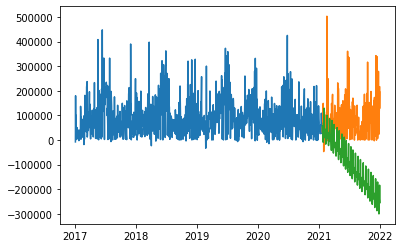

In [69]:
##정확도 계산
rmse=np.sqrt(np.mean(np.power((np.array(valid['증감납품요구수량'])-np.array(forecast['Prediction'])),2)))
print(rmse)

#plot
plt.plot(train['증감납품요구수량'])
plt.plot(valid['증감납품요구수량'])
plt.plot(forecast['Prediction'])